In [16]:
from google.colab import files

uploaded = files.upload()


Saving Sample - Superstore.csv to Sample - Superstore (1).csv


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:

dataset = pd.read_csv('Sample - Superstore.csv', encoding='ISO-8859-1')

In [19]:
dataset.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [20]:
dataset.shape

(9994, 21)

In [21]:
dataset.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [22]:
dataset.isnull()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
dataset['Category'].value_counts()

,count
Category,
Office Supplies,6026
Furniture,2121
Technology,1847


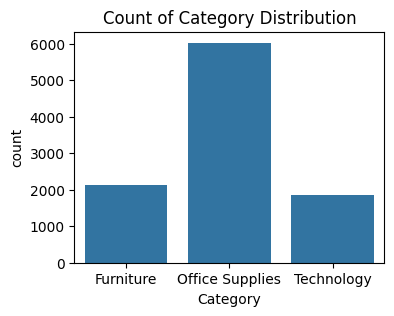

In [30]:
plt.figure(figsize=(4,3))
sns.countplot(x='Category', data=dataset)
plt.title("Count of Category Distribution")
plt.savefig('Category_Distribution.jpg')
plt.show()

In [31]:
duplicates = dataset.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

Duplicate rows: 0


In [33]:
for col in dataset.select_dtypes(include='object').columns:
    dataset[col] = dataset[col].str.strip()

In [36]:
# Check dtypes
print(dataset.dtypes)


Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object


In [35]:
dataset['Order Date'] = pd.to_datetime(dataset['Order Date'])
dataset['Ship Date'] = pd.to_datetime(dataset['Ship Date'])


In [37]:
# Example for "Category" and "Sub-Category"
print(dataset['Category'].unique())
print(dataset['Sub-Category'].unique())


['Furniture' 'Office Supplies' 'Technology']
['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [38]:
print(dataset[['Sales', 'Quantity', 'Profit']].describe())


              Sales     Quantity       Profit
count   9994.000000  9994.000000  9994.000000
mean     229.858001     3.789574    28.656896
std      623.245101     2.225110   234.260108
min        0.444000     1.000000 -6599.978000
25%       17.280000     2.000000     1.728750
50%       54.490000     3.000000     8.666500
75%      209.940000     5.000000    29.364000
max    22638.480000    14.000000  8399.976000


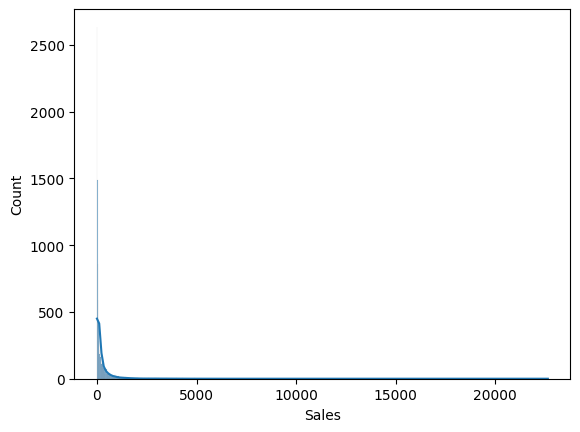

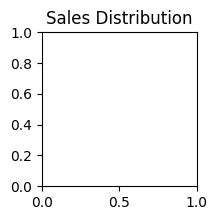

In [42]:
 #Distribution of Sales
sns.histplot(dataset['Sales'], kde=True)
plt.figure(figsize=(2,2))
plt.title('Sales Distribution')
plt.show()

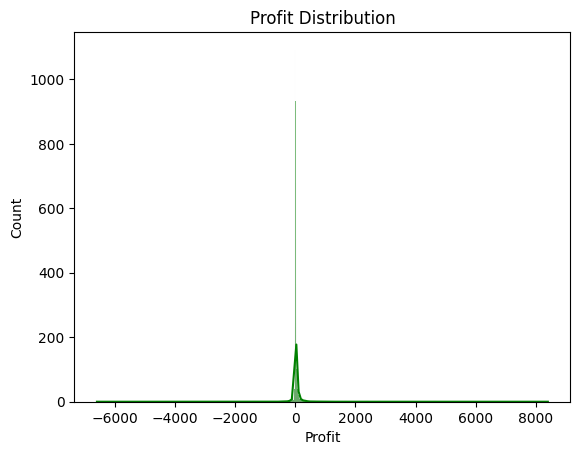

In [43]:
# Distribution of Profit
sns.histplot(dataset['Profit'], kde=True, color='green')
plt.title('Profit Distribution')
plt.show()

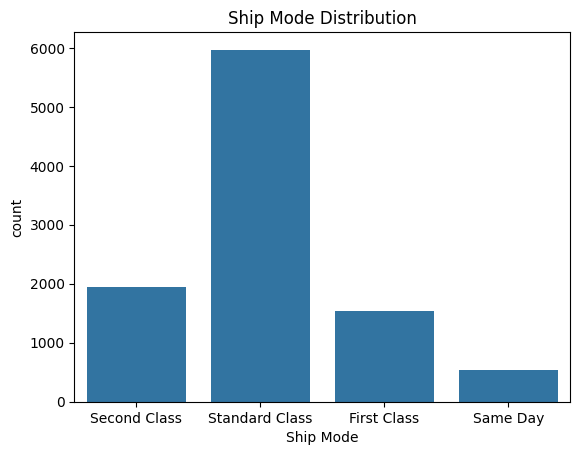

<Figure size 200x200 with 0 Axes>

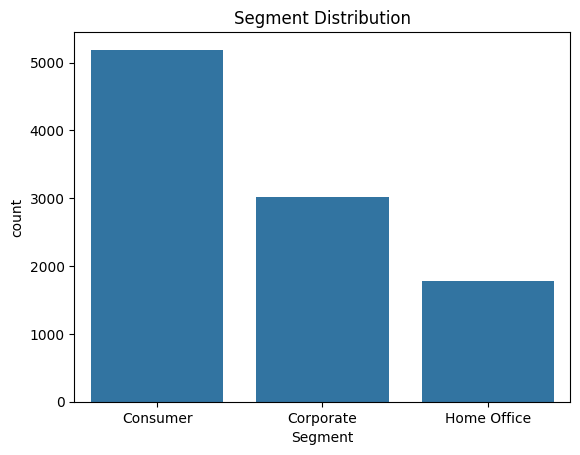

<Figure size 200x200 with 0 Axes>

In [45]:
# Countplot of Ship Mode
sns.countplot(data=dataset, x='Ship Mode')
plt.title('Ship Mode Distribution')
plt.figure(figsize=(2,2))
plt.show()

# Countplot of Segment
sns.countplot(data=dataset, x='Segment')
plt.title('Segment Distribution')
plt.figure(figsize=(2,2))
plt.show()


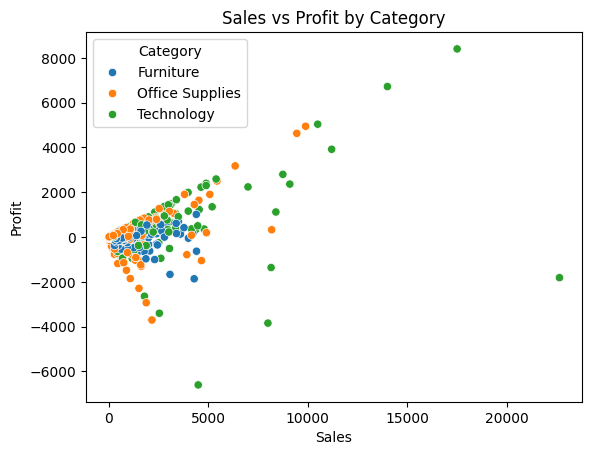

In [46]:
sns.scatterplot(data=dataset, x='Sales', y='Profit', hue='Category')
plt.title('Sales vs Profit by Category')
plt.show()


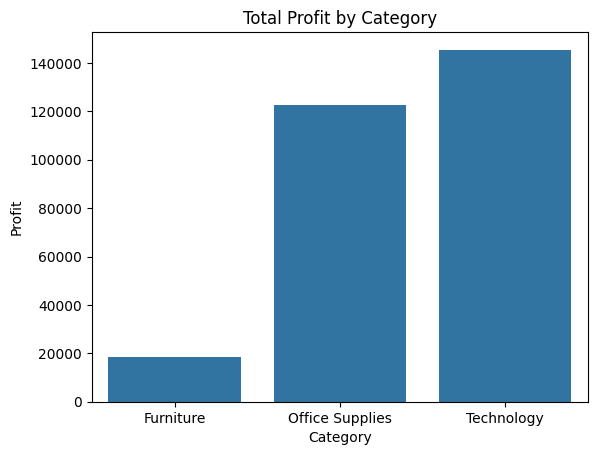

In [47]:
category_profit = dataset.groupby('Category')['Profit'].sum().reset_index()
sns.barplot(data=category_profit, x='Category', y='Profit')
plt.title('Total Profit by Category')
plt.show()


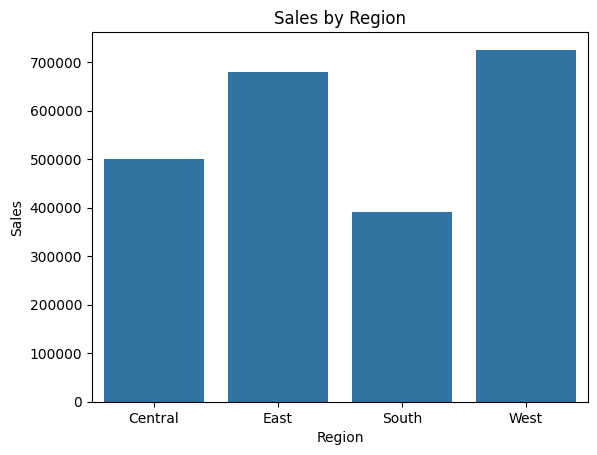

In [48]:
region_sales = dataset.groupby('Region')['Sales'].sum().reset_index()
sns.barplot(data=region_sales, x='Region', y='Sales')
plt.title('Sales by Region')
plt.show()


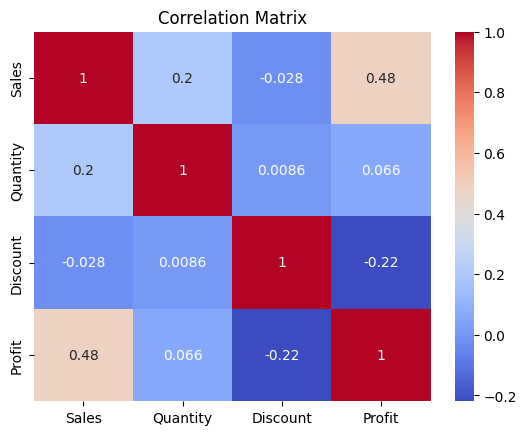

In [49]:
# Correlation heatmap
sns.heatmap(dataset[['Sales', 'Quantity', 'Discount', 'Profit']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
